### 웹크롤링 방법
 - 동적페이지 : URL의 변경 없이 페이지의 내용이 변경 : json 형태 데이터 수집
 - 정적페이지 : URL이 변경되면서 페이지의 내용이 변경 : html 형태 데이터 수집

In [1]:
import pandas as pd # 행렬구조 데이터 처리
import requests # url통해 서버를 통해 요청, 가져오기 실행

- 1. 웹서비스 분석: 개발자 도구를 이용해 분석 : 데이터 요청시 필요한게 -> url 즉 url 알아내기가 첫번째
- 2. 서버에 데이터 요청 : request(URL) > response(json 포멧의 데이터 (str)) -> dictionary나 list 형태  
- 3. Json(str) > parsing > dict, list 형태로 데이터 바꿔줌 > DataFrame

### 네이버 주가 데이터 수집
- 동적 페이지 : JSON
- PC 페이지가 복잡하면 모바일 페이지에서 수집

In [2]:
page_size, page = 20, 1
url = "https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=10&page=2"

In [3]:
response  = requests.get(url)
response # status code 성공이면 200번대, url이 오류거나 서버쪽 비정상적 차단 - > 400번대나 500번대

<Response [200]>

In [4]:
response.text[:200]

'[{"localTradedAt":"2022-10-13","closePrice":"651.59","compareToPreviousClosePrice":"-20.08","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-2.99","openPrice":"'

In [5]:
datas = response.json()
type(datas)

list

In [6]:
kospi_df = pd.DataFrame(datas)
kospi_df.head()

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2022-10-13,651.59,-20.08,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.99,669.36,669.71,650.39
1,2022-10-12,671.67,2.17,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.32,669.59,673.42,663.60
2,2022-10-11,669.50,-28.99,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-4.15,685.30,685.30,667.63
3,2022-10-07,698.49,-7.52,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.07,700.71,707.42,697.59
4,2022-10-06,706.01,20.67,"{'code': '2', 'text': '상승', 'name': 'RISING'}",3.02,690.48,706.43,690.48


In [7]:
colums = ["stocks", 'close']

In [8]:
def stock_price(code =" KOSPI", page_size=20, page=1):
    """
    params: code(KOSPI or KOSDAQ)
    """
    url = f"https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}"
    response = requests.get(url)
    datas = response.json()
    return pd.DataFrame(datas)[["localTradedAt", "closePrice"]]

In [9]:
df = stock_price("KOSDAQ")
df.head(2)

,localTradedAt,closePrice
0,2022-10-27,691.91
1,2022-10-26,683.17


In [11]:
# 5 . 실습 : 원달러 환율 데이터 수집

In [10]:
def exchange_rate(code="FX_USDKRW", page_size=20,page=1):
    url = f"https://api.stock.naver.com/marketindex/exchange/{code}/prices?page={page}&pageSize={page_size}"
    response = requests.get(url)
    datas = response.json()
    return pd.DataFrame(datas)[["localTradedAt", "closePrice"]]

In [12]:
usd = exchange_rate()
usd.head()

,localTradedAt,closePrice
0,2022-10-27,"1,421.50"
1,2022-10-26,"1,420.00"
2,2022-10-25,"1,433.00"
3,2022-10-24,"1,442.00"
4,2022-10-21,"1,438.00"


In [13]:
# 시각화 및 상관관계 분석

In [14]:
%config InLineBackend.figure_formats = {'png','retina'}

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 데이터 수집 : kospi, kosdaq, usd
# kospi = stock_price()
kosdaq = stock_price("KOSDAQ")
usd = exchange_rate()

In [17]:
# 데이터 전처리 : str> float
kosdaq.dtypes

localTradedAt    object
closePrice       object
dtype: object

In [18]:
kosdaq["closePrice"] = kosdaq["closePrice"].apply(lambda data: float(data.replace(",","")))

In [19]:
usd["closePrice"] = usd["closePrice"].apply(lambda data: float(data.replace(",","")))

In [20]:
usd.dtypes

localTradedAt     object
closePrice       float64
dtype: object

In [21]:
# lambda : 일회성 함수 : lambda params: return  -메모리 줄일수 있음

In [23]:
# apply(func) : 모든 데이터에 func을 적용시킨 결과를 출력

In [24]:
df = kosdaq.copy()
df = df.rename(columns = {"localTradedAt":"date","closePrice": "kosdaq"})
df['usd'] = usd["closePrice"]
df.head()

,date,kosdaq,usd
0,2022-10-27,692.03,1421.5
1,2022-10-26,683.17,1420.0
2,2022-10-25,688.85,1433.0
3,2022-10-24,688.50,1442.0
4,2022-10-21,674.48,1438.0


In [25]:
df.dtypes

date       object
kosdaq    float64
usd       float64
dtype: object

In [26]:
# 그래프 그리기

In [27]:
df.columns

Index(['date', 'kosdaq', 'usd'], dtype='object')

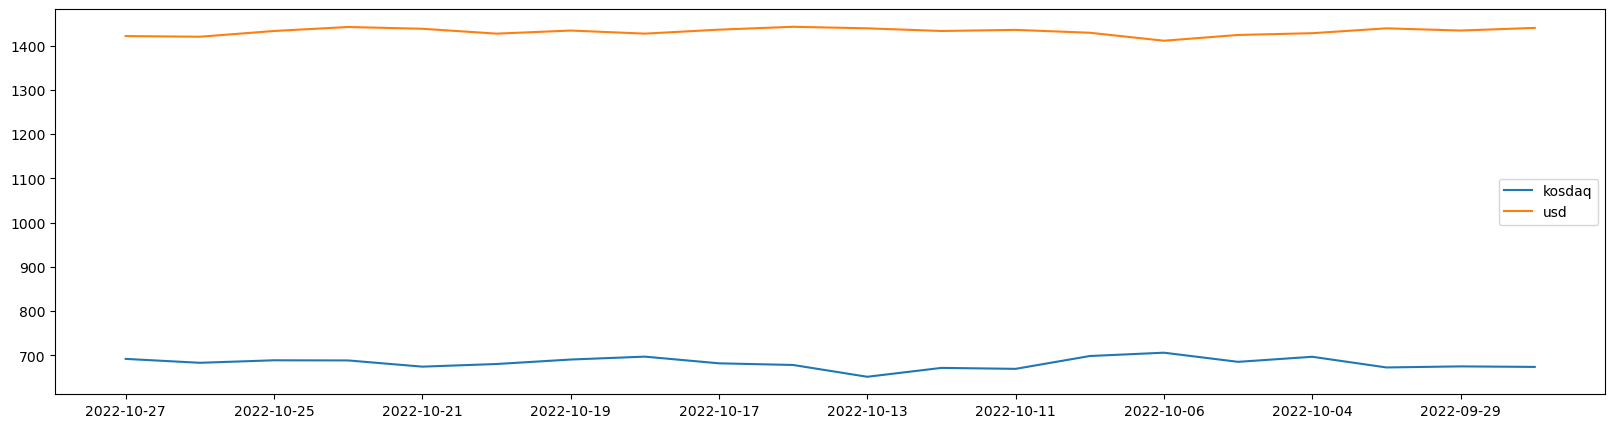

In [28]:
plt.figure(figsize =(20,5))
# plt.plot(df['date'], df ['kosdaq'], label ='kosdaq')
# plt.plot(df['date'], df ['usd'], label = 'usd')

for column in df.columns[1:]:
    plt.plot(df['date'],df[column],label=column)
plt.legend()
plt.xticks(df['date'][::2])
plt.show()

In [29]:
# 데이터 스케일링 : min max scale
# z = (x - min(x) ) / (max(x)  - min(x) ) : 0 <=z <= 1

In [30]:
from sklearn.preprocessing import minmax_scale

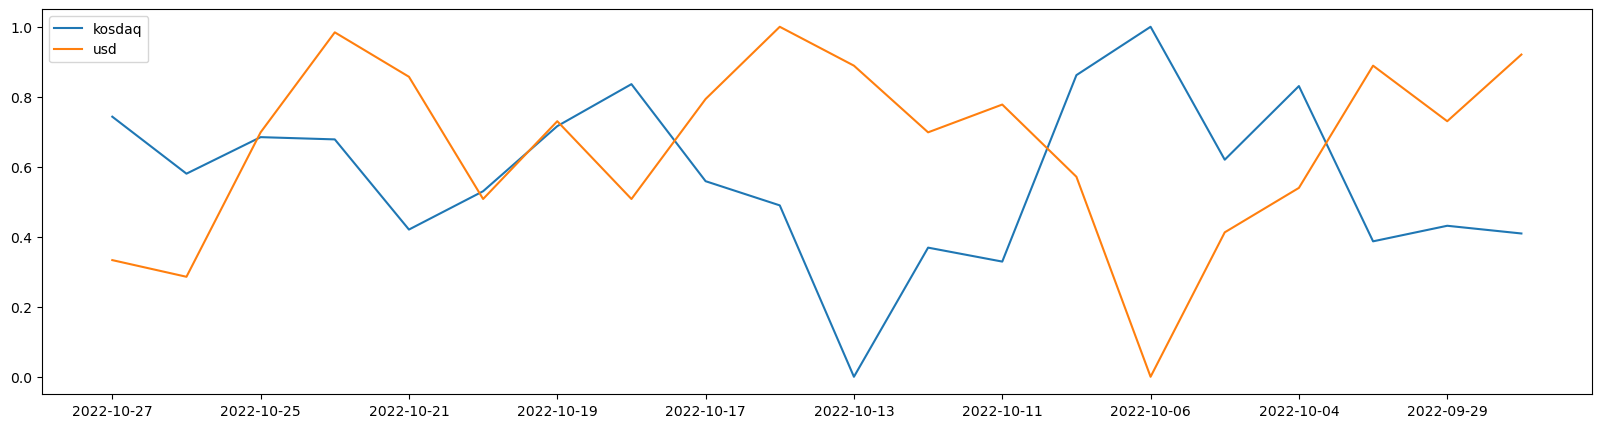

In [31]:
plt.figure(figsize =(20,5))
# plt.plot(df['date'], df ['kosdaq'], label ='kosdaq')
# plt.plot(df['date'], df ['usd'], label = 'usd')

for column in df.columns[1:]:
    plt.plot(df['date'],minmax_scale(df[column]),label=column)
plt.legend()
plt.xticks(df['date'][::2])
plt.show()

In [ ]:
# 상관관계 분석
#상관계수해석 : 
# 0과 가까울수록 두 데이터는 관계 X, 
# 1과 가까울수록 두 데이터는 강한 양의 상관관계를 갖는다. (비례)
# -1과 가까울수록 두 데이터는 강한 음의 상관관계 (반비례)

In [ ]:
# kosdaq - usd : 음의 상관관계를 갖는다

In [32]:
df[df.columns[1:]].corr()

,kosdaq,usd
kosdaq,1.000000,-0.625064
usd,-0.625064,1.000000
